<a href="https://colab.research.google.com/github/AadiIngrole/Ted-Talks-Views-Prediction/blob/main/Ted_Talks_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ted Talk Views Prediction

---



##TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,Jimmy Wales, Shahrukh Khan, and Bill Gates.The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

---



## Features information:
## The dataset contains features like:

---


### 1. talk_id: Talk identification number provided by TED
###2. title: Title of the talk
###3. speaker_1: First speaker in TED's speaker list
###4. all_speakers: Speakers in the talk
###5. occupations: Occupations of the speakers
###6. about_speakers: Blurb about each speaker
###7. recorded_date: Date the talk was recorded
###8. published_date: Date the talk was published to TED.com
###9. event: Event or medium in which the talk was given
###10. native_lang: Language the talk was given in
###11. available_lang: All available languages (lang_code) for a talk
###12. comments: Count of comments
###13. duration: Duration in seconds
###14. topics: Related tags or topics for the talk
###15. related_talks: Related talks (key='talk_id',value='title')
###16. url: URL of the talk
###17. description: Description of the talk
###18. transcript: Full transcript of the talk 

---



###Target Variable :
### 'views': Count of views

## The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

---



# Mounting drive and importing libraries


In [59]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
#importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

In [61]:
#read csv file
data = pd.read_csv('/content/gdrive/MyDrive/EDA Capstone Project 2/data_ted_talks.csv')

### Data Inspecting

In [62]:
data.shape

(4005, 19)

In [63]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [64]:
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [65]:
data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


###Handling rows with null values

In [66]:
Total = data.isnull().sum().sort_values(ascending=False)
Percentage = ((data.isnull().sum())/(data.isnull().count())).sort_values(ascending=False)
missing_values = pd.concat([Total,Percentage],keys=['Total','Percentage'],axis=1)
missing_values

,Total,Percentage
comments,655,0.163546
occupations,522,0.130337
about_speakers,503,0.125593
all_speakers,4,0.000999
recorded_date,1,0.000250
talk_id,0,0.000000
description,0,0.000000
url,0,0.000000
related_talks,0,0.000000
topics,0,0.000000


In [67]:
num_cols = data.select_dtypes(np.number).columns.tolist()
cat_cols = data.select_dtypes('object').columns.tolist() 

In [68]:
from sklearn.impute import SimpleImputer,KNNImputer
SI = SimpleImputer(missing_values=np.NaN,strategy="mean")
data[num_cols]=SI.fit_transform(data[num_cols])

In [69]:
cat_SI = SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
data[['occupations','all_speakers']]=cat_SI.fit_transform(data[['occupations','all_speakers']])

In [70]:
data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        0
occupations         0
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments            0
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [71]:
data = data.drop(['about_speakers'],axis=1)

In [72]:
data = data.dropna(axis=0)

In [73]:
data.reset_index(inplace=True)

In [74]:
data.isnull().sum()

index             0
talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [75]:
data.columns

Index(['index', 'talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript'],
      dtype='object')

### Changing column names so its easy to read

In [76]:
data.rename(columns = {'speaker_1': 'main_speaker'}, inplace = True)

In [77]:
data

,index,talk_id,title,main_speaker,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,0,1.0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392.0,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.000000,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,1,92.0,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685.0,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.000000,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,2,7.0,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832.0,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.000000,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,3,53.0,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069.0,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.000000,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,4,66.0,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954.0,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.000000,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,4000,62678.0,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},502934.0,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.000000,690.0,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4000,4001,62782.0,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},{0: ['writer']},307187.0,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",161.997015,346.0,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4001,4002,62263.0,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},464414.0,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.000000,774.0,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomor

# Data Exporation & EDA

## Longest TED talk speakers

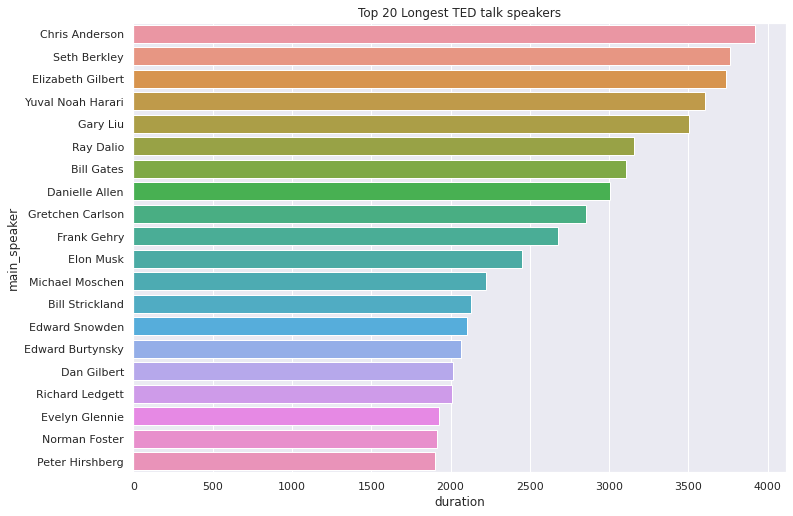

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="duration", y="main_speaker", data=data.sort_values('duration', ascending = False) [0:20]).set(title="Top 20 Longest TED talk speakers")

### Observations

### 1.   The above plot shows, Cheris Anderson talked for really long time. A lot people do not like to watch longer videos unless it is very interesting. Let’s find out how many views these speaker has got.
###2. lets check if longest videos get more views or not



### Top 20 most watched speakers

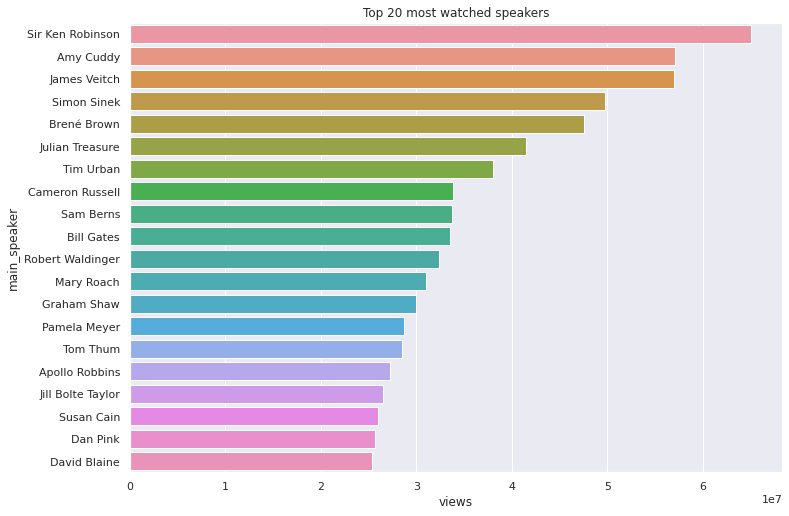

In [79]:
ax = sns.barplot(x='views', y= 'main_speaker', data=data.sort_values('views', ascending = False) [0:20]).set(title="Top 20 most watched speakers")

###Observation

###In the above plot, as we can see Charles Anderson is not here but a lot name are here from previous plot. So there is no high correlation between views and duration.


## 20 most famous TED talks

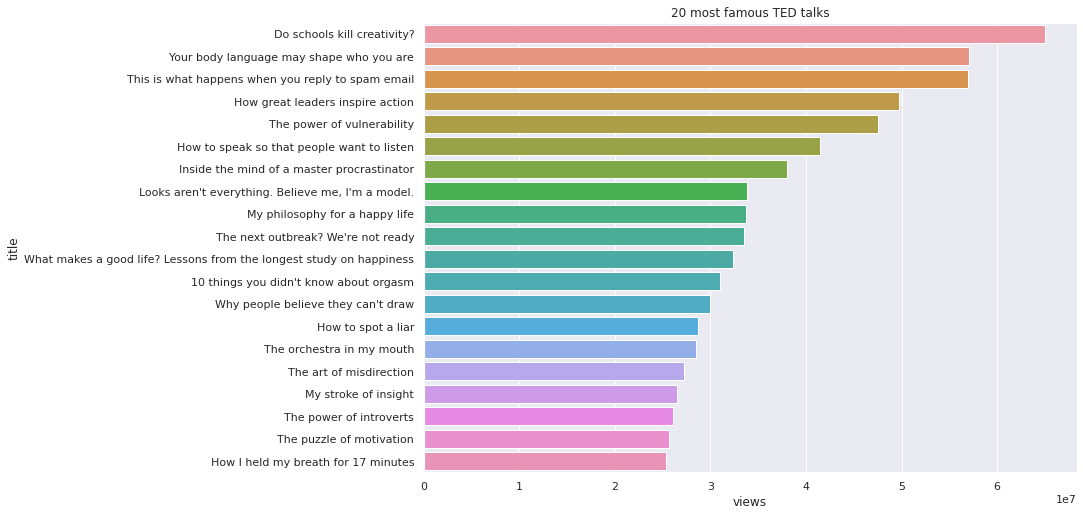

In [80]:
ax = sns.barplot(x = 'views', y = 'title', data = data.sort_values('views', ascending = False) [0:20]).set(title = "20 most famous TED talks")

###Observation
### 1.   As per above barplot we can see that "Do Schools Kill creativity?" is most popular Talk with most views 

### 2.   "Your body language may shape who you are" and "This is what happens when you reply to spam" are close for 2nd place 

##TED talks per Month

In [81]:
data['recorded_month']=data['recorded_date'].str.split('-',expand=True)[1].astype('float').astype('Int64')
talks_count = pd.DataFrame(data['recorded_month'].value_counts()).reset_index()
talks_count.columns = ['months','talks']
talks_count.head()

,months,talks
0,2,658
1,3,486
2,4,485
3,11,456
4,6,370


[Text(0.5, 1.0, 'Number of TED talks per month')]

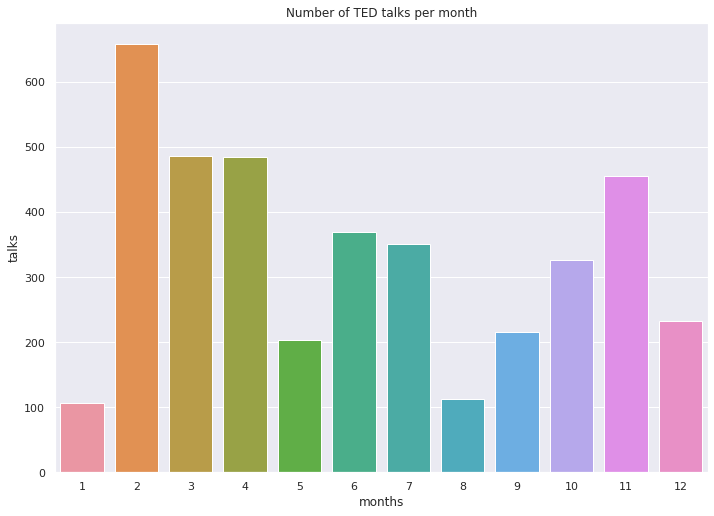

In [82]:
sns.barplot(x='months', y = 'talks', data = talks_count).set(title = 'Number of TED talks per month')

###Observations

### 1.   As above barplot shows February is favourite month for the ted talks
###2.   January and August has Minimum number of talks 



In [83]:
data['published_month'] = data['published_date'].str.split('-',expand=True)[1].astype('float').astype('Int64')
view_count = pd.DataFrame(data['published_month'].value_counts()).reset_index()
view_count.columns = ['months','published_talks']

[Text(0.5, 1.0, 'Talks published by months')]

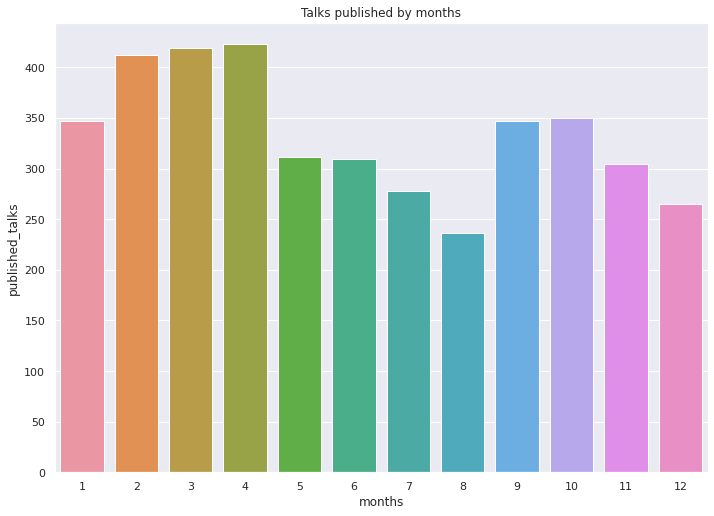

In [84]:
sns.barplot(x = 'months', y = 'published_talks', data = view_count).set(title = 'Talks published by months')

## Most popular topic tags

There are 404048 words in the combination of all topics.


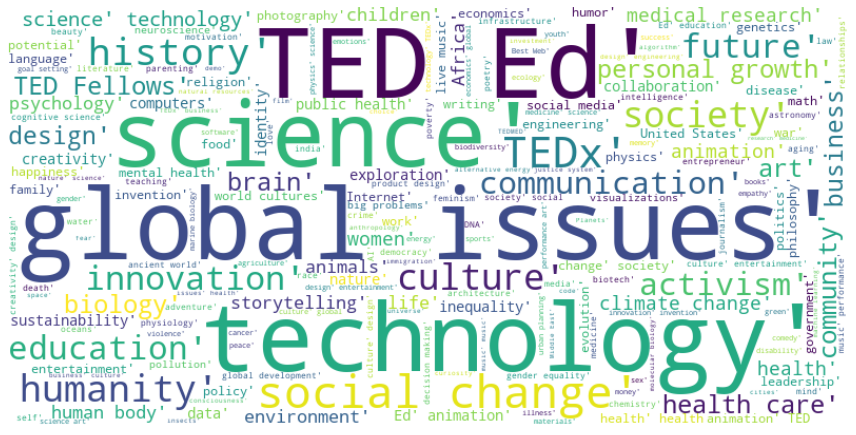

In [85]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in data.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

###Observation
###1. Most popular tags are global issues, technology, science, Ted ED, social change

##Count of talks by Year

In [86]:
data['Year'] = data['published_date'].str.split('-',expand=True)[0].astype('float').astype('Int64')
year_df = pd.DataFrame(data['Year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

In [87]:
year_df.sort_values('talks', ascending = False).head(10)

,year,talks
0,2019,702
1,2018,477
2,2017,315
3,2012,303
4,2011,255
5,2013,242
6,2016,242
7,2014,240
8,2010,230
9,2015,220


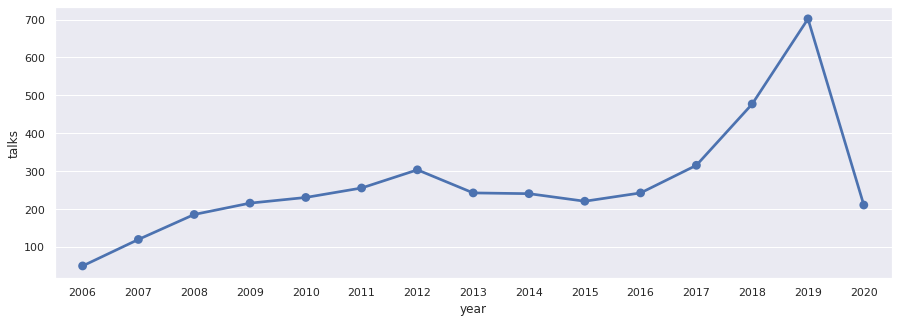

In [88]:
ax= sns.pointplot( x ='year', y= 'talks', data = year_df, annote =  True)

### Observation

1.  As expected, the number of TED Talks have gradually increased over the years since its inception in 2006.
2.  2018 has most number of TED talks per year
3.  After 2019 we can see big drop in chart due to pandemic


##Most Appearance of a main speaker

In [89]:
speaker_data = data.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_data.columns = ['main_speaker', 'appearances']
speaker_data = speaker_data.sort_values('appearances', ascending=False)
speaker_data.head(10)

,main_speaker,appearances
104,Alex Gendler,34
1318,Iseult Gillespie,19
998,Emma Bryce,12
715,Daniel Finkel,11
1231,Hans Rosling,10
108,Alex Rosenthal,10
1638,Juan Enriquez,9
1196,Greg Gage,9
581,Chris Anderson,8
2000,Marco Tempest,7


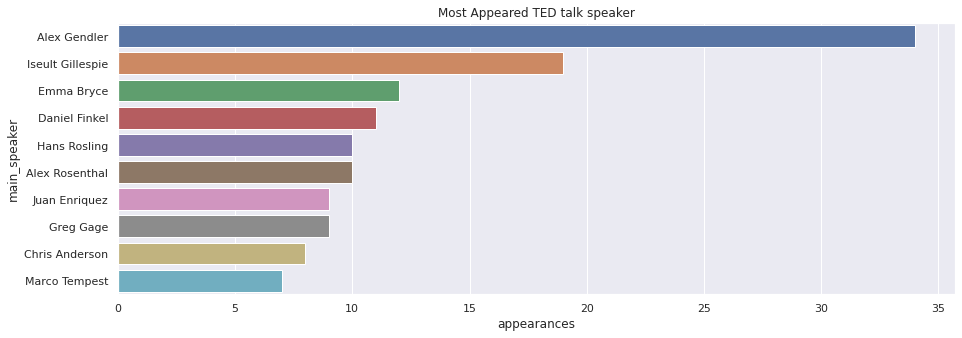

In [90]:
ax = sns.barplot(x="appearances", y="main_speaker", data=speaker_data.sort_values('appearances', ascending = False) [0:10]).set(title="Most Appeared TED talk speaker")

### Obeservations

### 1.  We can see that Alex Gendler is most appeared Speaker with 34 appearances



# Correlation

In [91]:
data.head()

,index,talk_id,title,main_speaker,all_speakers,occupations,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,recorded_month,published_month,Year
0,0,1.0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392.0,2006-02-25,2006-06-27,TED2006,...,272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2,6,2006
1,1,92.0,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685.0,2006-02-22,2006-06-27,TED2006,...,628.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2,6,2006
2,2,7.0,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832.0,2006-02-24,2006-06-27,TED2006,...,124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2,6,2006
3,3,53.0,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069.0,2006-02-26,2006-06-27,TED2006,...,219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2,6,2006
4,4,66.0,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954.0,2006-02-25,2006-06-27,TED2006,...,4931.0,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2,6,2006


In [92]:
data['related_talks'][0]

'{243: \'New thinking on the climate crisis\', 547: \'The business logic of sustainability\', 2093: \'The state of the climate — and what we might do about it\', 54715: \'How we can turn the tide on climate\', 29968: \'The most important thing you can do to fight climate change: talk about it\', 2339: "Climate change is happening. Here\'s how we adapt"}'

In [93]:
len(data['related_talks'][0].split(','))

6

In [94]:
data['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [95]:
data['available_lang'][0]

"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa', 'fr', 'fr-ca', 'gl', 'gu', 'he', 'hi', 'hr', 'hu', 'id', 'it', 'ja', 'ko', 'lt', 'lv', 'mk', 'nl', 'pl', 'pt', 'pt-br', 'ro', 'ru', 'sk', 'sl', 'sq', 'sr', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'zh-cn', 'zh-tw']"

In [96]:
data['total_available_lang'] = 1
data['total_related_talks'] = 1
data['all_speakers_count']=1
data['total_topics']=1
data['occupations_count'] = 1
for i in range(len(data)):
  data['total_topics'][i] = len(data['topics'][i].split(','))
  data['total_available_lang'][i] = len(data['available_lang'][i].split(','))
  data['total_related_talks'][i] = len(data['related_talks'][i].split(','))
  data['occupations_count'][i] = len(data['occupations'][i].split(','))
  data['all_speakers_count'][i] = len(data['all_speakers'][i].split(','))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Setti

In [97]:
data = data.drop(['index','talk_id','title','main_speaker','all_speakers','occupations','recorded_date','published_date','event','native_lang',
       'available_lang','topics', 'related_talks',
       'url', 'description', 'transcript', ],axis=1)

In [98]:
data['views'] = data['views'].astype('int64')
data['comments'] = data['comments'].astype('int64')
data['duration'] = data['duration'].astype('int64')

In [99]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Columns: 11 entries, views to occupations_count
dtypes: Int64(3), int64(8)
memory usage: 355.9 KB


In [100]:
corr = data.corr()

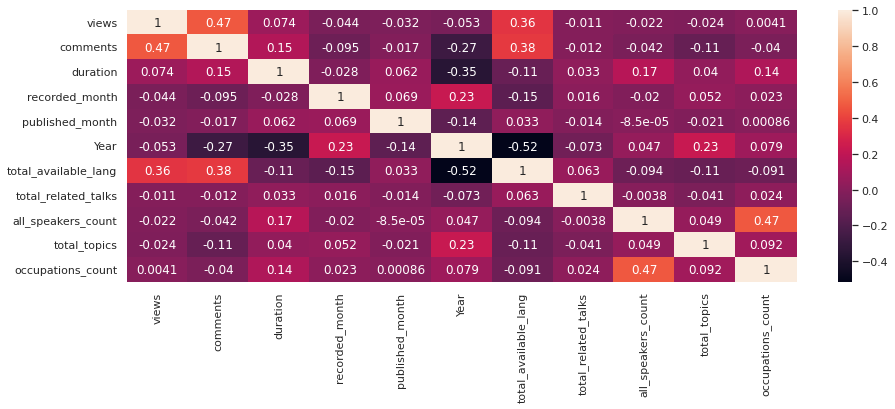

In [101]:
sns.heatmap(corr,annot=True)

In [102]:
num_cols = data.select_dtypes(np.number).columns.tolist()

In [103]:
data['views'].dtype

dtype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


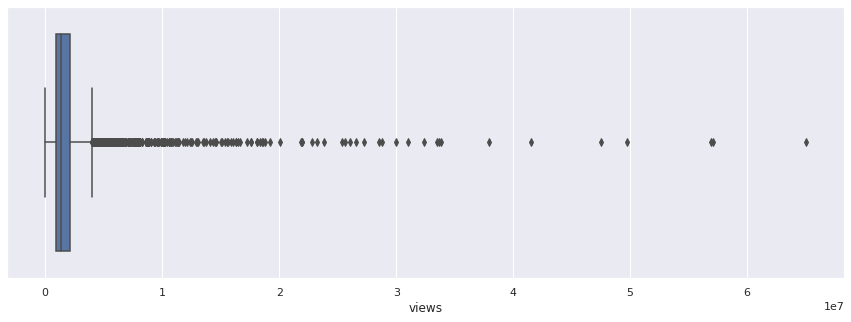

In [104]:
sns.boxplot('views',data=data)

# Spliting Train & Test Data 

In [105]:
X = data.drop(['views'],axis=1)
Y = data['views']

In [106]:
X.head()

,comments,duration,recorded_month,published_month,Year,total_available_lang,total_related_talks,all_speakers_count,total_topics,occupations_count
0,272,977,2,6,2006,43,6,1,9,1
1,628,1190,2,6,2006,49,6,1,11,1
2,124,1286,2,6,2006,26,6,1,9,1
3,219,1116,2,6,2006,35,6,1,9,1
4,4931,1164,2,6,2006,62,7,1,7,2


In [107]:
Y.head()

0     3523392
1    14501685
2     1920832
3     2664069
4    65051954
Name: views, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

# Linear Regression

In [109]:
#Linear Regression import
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [110]:
lr_pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


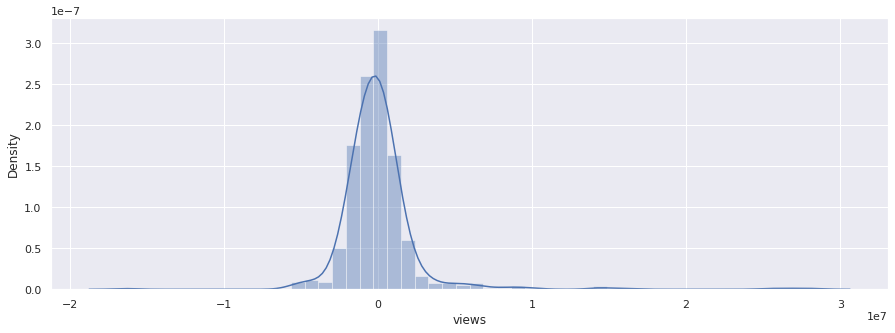

In [111]:
sns.distplot(y_test-lr_pred)

In [112]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr_mse = mean_squared_error(y_test,lr_pred)
print(lr_mse)

8255358383588.036


In [113]:
import math
lr_rmse = math.sqrt(lr_mse)
lr_rmse

2873213.946713338

In [114]:
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_mae

1425219.9968478298

In [115]:
print(y_test.min())
print(y_test.max())
print(y_test.mean())

0
33874546
2118579.826955075


In [116]:
from sklearn.metrics import r2_score
lr_r2e = r2_score(y_test,lr_pred)
lr_r2e

0.2228313433873116

In [117]:
print("RMSE on Test Data :",lr_rmse)
print("MAE on Test Data :",lr_mae)
print("R2e on Test data :",lr_r2e)

RMSE on Test Data : 2873213.946713338
MAE on Test Data : 1425219.9968478298
R2e on Test data : 0.2228313433873116


# Random Forest Regressor

In [118]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

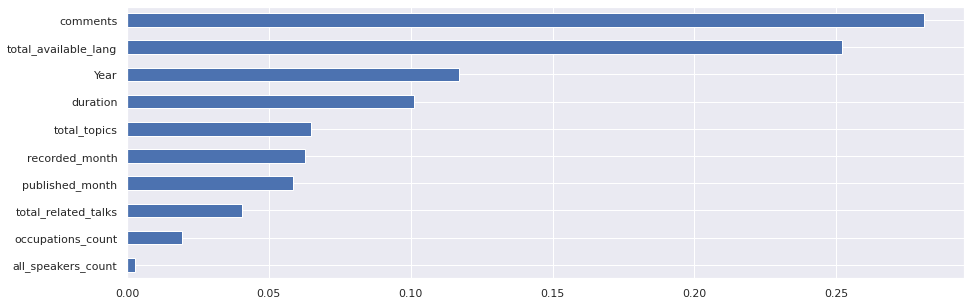

In [119]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
feature_imp.plot(kind="barh")
plt.show()

###HyperParameter Tunning

In [120]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [121]:
n_estimators = [int (x) for x in np.linspace(100,1200,12)]
max_depth = [int (x) for x in np.linspace(5,30,6)]
max_features = ['auto','sqrt']
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [122]:
random_grid = {
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
}

In [123]:
rf = RandomForestRegressor()

In [124]:
random_rf = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42)

In [125]:
random_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [126]:
random_rf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [127]:
random_rf.best_score_

-6859074496965.145

In [128]:
rf_pred = random_rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


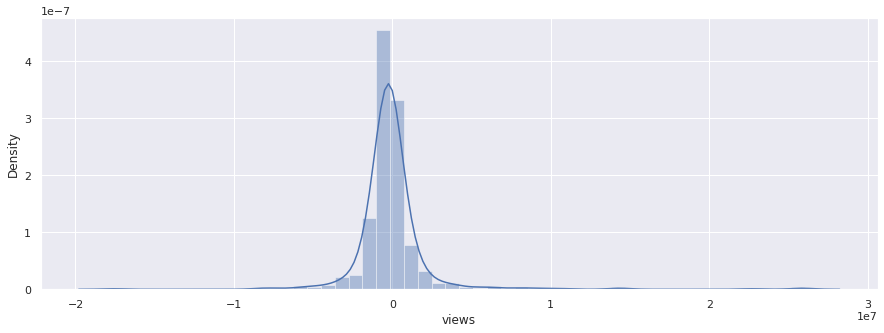

In [138]:
sns.distplot(y_test-rf_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


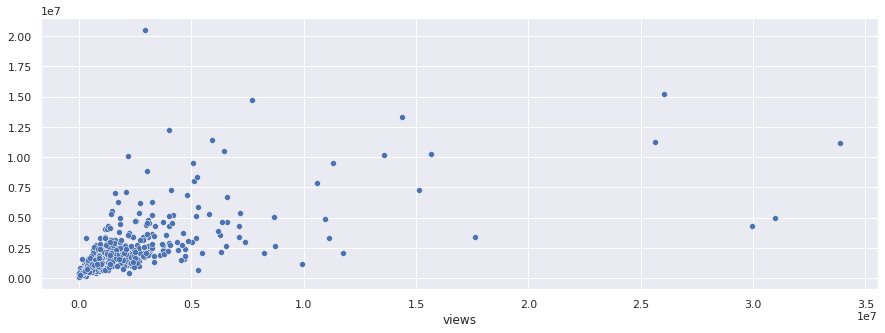

In [139]:
sns.scatterplot(y_test,rf_pred)

In [140]:
rf_mse = mean_squared_error(y_test,rf_pred)
print(rf_mse)

6912940989515.298


In [141]:
rf_rmse = math.sqrt(rf_mse)
rf_rmse

2629247.228678828

In [142]:
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_mae

1124498.2930225898

In [143]:
rf_r2e = r2_score(y_test,rf_pred)
rf_r2e

0.3492080158815192

In [144]:
print("RMSE on Test Data :",rf_rmse)
print("MAE on Test Data :",rf_mae)
print("R2e on Test data :",rf_r2e)

RMSE on Test Data : 2629247.228678828
MAE on Test Data : 1124498.2930225898
R2e on Test data : 0.3492080158815192


#Result

In [145]:
error = {'Model':  ['Linear Regression', 'Random Forest Regressor'],'MSE':[lr_mse, rf_mse],'RMSE': [lr_rmse, rf_rmse], 'MAE': [lr_mae, rf_mae], 'r2e': [lr_r2e, rf_r2e]}
result = pd.DataFrame(error)
result

,Model,MSE,RMSE,MAE,r2e
0,Linear Regression,8.255358e+12,2.873214e+06,1.425220e+06,0.222831
1,Random Forest Regressor,6.912941e+12,2.629247e+06,1.124498e+06,0.349208


## Conclusion

---



---


### Performed Exploratory data analysis on various features, then carried out feature engineering and encoding of categorical columns, handled missing values in the dataset then carried out feature selection and build various models###

###Following models have been used:


*   Linear Regression
*   Random Forest Regressor

###Evaluated these models on various metrics like MSE, RMSE, MAE ,R2 score. Finally selected the best model out of these two.

### After evaluating the performance of all the models, the best model is Random Forest Regressor.


